Berikut adalah hal / kode umum yang digunakan untuk setiap nomor

In [1]:
#library
from Bio import Entrez, SeqIO , pairwise2
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import numpy as np
from Bio.pairwise2 import format_alignment
from scipy.optimize import differential_evolution
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceCalculator
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from tabulate import tabulate

#email
Entrez.email = 'learnbiopython@gmail.com'

#pembacaan file fasta
apoeAcipenser = list(SeqIO.parse("APOE-Acipenser.fasta", "fasta"))
apoeChristchurch = list(SeqIO.parse("APOE-Christchurch.fasta", "fasta")) 
apoeBos = list(SeqIO.parse("APOE-Bos.fasta", "fasta"))
apoeCercopithecus = list(SeqIO.parse("APOE-Cercopithecus.fasta", "fasta"))
apoeOryctolagus = list(SeqIO.parse("APOE-Oryctolagus.fasta", "fasta"))
apoePan = list(SeqIO.parse("APOE-Pan.fasta", "fasta"))
apoeSiniperca = list(SeqIO.parse("APOE-Siniperca.fasta", "fasta"))

/Users/ed282828/Library/Python/3.9/lib/python/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


Nomor 1

In [2]:
#baca file fasta dan ambil ID
seqApoeID = apoeAcipenser[0].id

In [3]:
#definisikan fungsi untuk mengambil record dari database
def fetch_record(accession):
    handle = Entrez.efetch(db="nucleotide", id=accession, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()
    return record


In [4]:
#panggil fungsi fetch_record dan simpan ke dalam variabel record
record = fetch_record(seqApoeID)

In [5]:
# Ambil fitur gen dan CDS
gene_feature = next((feature for feature in record.features if feature.type == "gene"), None)
cds_feature = next((feature for feature in record.features if feature.type == "CDS"), None)

print(apoeAcipenser[0])

# Print informasi yang diinginkan
print(f'Species : {record.annotations["organism"]}')

print(f'Location : {record.features[0].location}')
print(f'Taxon : {", ".join(record.annotations["taxonomy"])}')
print(f'Taxon ID : {", ".join(record.features[0].qualifiers["db_xref"])}')
print(f'Molecule Type : {record.annotations["molecule_type"]}')

if gene_feature:
    print(f"Gene: {gene_feature.qualifiers.get('gene', [''])[0]}")
else:
    print("Gene information not found.")

if cds_feature:
    print(f"Protein ID: {cds_feature.qualifiers.get('protein_id', [''])[0]}")
    print(f"Protein Name: {cds_feature.qualifiers.get('product', [''])[0]}")
    print(f"Codon start: {cds_feature.qualifiers.get('codon_start', [''])[0]}")
else:
    print("CDS information not found.")


ID: KY560197.1
Name: KY560197.1
Description: KY560197.1 Acipenser ruthenus ApoE (apoE) mRNA, partial cds
Number of features: 0
Seq('CGAGAAGTTGGAACCCTACACCGGAAATATCAGAGAGTCCACCCAGCAGAAGCT...GCA')
Species : Acipenser ruthenus
Location : [0:138](+)
Taxon : Eukaryota, Metazoa, Chordata, Craniata, Vertebrata, Euteleostomi, Actinopterygii, Chondrostei, Acipenseriformes, Acipenseridae, Acipenser
Taxon ID : taxon:7906
Molecule Type : mRNA
Gene: apoE
Protein ID: ASM79337.1
Protein Name: ApoE
Codon start: 2


Nomor 2

In [6]:
#mengambil sequens dari file fasta
seqApoeAcipenser = apoeAcipenser[0].seq
seqApoeChristchurch = apoeChristchurch[0].seq

In [7]:
#translasikan menjadi asam amino
acidAcipenser = seqApoeAcipenser.translate()
acidChristchurch = seqApoeChristchurch.translate()

/Users/ed282828/Library/Python/3.9/lib/python/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [8]:
#mencetak hasil
print("Acid Acipenser : ", acidAcipenser[0:10])

Acid Acipenser :  REVGTLHRKY


In [9]:
#potong sequence acipenser
# 30 karena 1 codon = 3 basa
seqApoeAcipenser = seqApoeAcipenser[0:30]

In [10]:
#cari apakah asam amino acipenser terkanal di christchurch
find = acidChristchurch.find(acidAcipenser)
print(find)

-1


In [11]:
# Mutasi yang akan dilakukan adalah mutasi missense
# Mutasi missense adalah mutasi yang mengubah satu basa menjadi basa lain
# Mutasi ini yang paling mudah dilakukan karena hanya mengubah basa 
# Bukan menghapus basa atau menambah basa

# Fungsi untuk mencari mutasi yang diperlukan
# fungsi ini dilakukan agar sequence target dibuah menjadi seequence tujuan
def find_mutations(seq1, seq2):
    mutations = []
    for i in range(len(seq1)):
        if seq1[i] != seq2[i]:
            mutations.append((i, seq1[i], seq2[i]))
    return mutations

In [12]:
# Mencari mutasi yang diperlukan
mutations = find_mutations(seqApoeAcipenser, seqApoeChristchurch)

In [13]:
# Output posisi dan mutasi yang diperlukan
print("Mutasi yang diperlukan untuk mengubah ApoE Acipenser menjadi ApoE Christchurch:")
for pos, base_acipenser, base_christchurch in mutations:
    print(f"Posisi {pos}: {base_acipenser} -> {base_christchurch}")

Mutasi yang diperlukan untuk mengubah ApoE Acipenser menjadi ApoE Christchurch:
Posisi 0: C -> A
Posisi 2: A -> G
Posisi 3: G -> A
Posisi 4: A -> G
Posisi 5: A -> C
Posisi 6: G -> C
Posisi 7: T -> G
Posisi 8: T -> C
Posisi 9: G -> T
Posisi 10: G -> T
Posisi 12: A -> C
Posisi 13: C -> G
Posisi 15: C -> A
Posisi 16: T -> G
Posisi 17: A -> C
Posisi 18: C -> T
Posisi 19: A -> T
Posisi 20: C -> G
Posisi 23: G -> C
Posisi 25: A -> G
Posisi 26: A -> G
Posisi 28: A -> G
Posisi 29: T -> G


In [14]:
#Menerapkan mutasi pada tingkat DNA
#bertujuan untuk mengganti setiap karakter pada urutan DNA ApoE Acipenser 
#dengan karakter yang sesuai pada urutan DNA ApoE Christchurch
seqApoeAcipenser_mutated = list(seqApoeAcipenser)
for pos, _, base_christchurch in mutations:
    seqApoeAcipenser_mutated[pos] = base_christchurch
seqApoeAcipenser_mutated = ''.join(seqApoeAcipenser_mutated)

In [15]:
# Menerjemahkan kembali urutan DNA yang sudah dimutasi ke dalam asam amino
acidAcipenser_mutated = Seq(seqApoeAcipenser_mutated).translate()

In [16]:
# Output hasil urutan yang sudah dimutasi
print("\nUrutan ApoE Acipenser setelah dimutasi:")
print(seqApoeAcipenser_mutated)
print("\nAsam amino ApoE Acipenser setelah dimutasi:")
print(acidAcipenser_mutated)
print("\nAsam amino ApoE Christchurch:")
print(acidChristchurch)
print("\nAsam amino ApoE Acipenser termutasu ditemukan pada index:")
print(acidChristchurch.find(acidAcipenser_mutated))


Urutan ApoE Acipenser setelah dimutasi:
AGGAGCCGCTTACGCAGCTTGCGCAGGTGG

Asam amino ApoE Acipenser setelah dimutasi:
RSRLRSLRRW

Asam amino ApoE Christchurch:
RSRLRSLRRWEARLTRSSSVLWPSMACTSPRYCTRR

Asam amino ApoE Acipenser termutasu ditemukan pada index:
0


Nomor 3

In [17]:
#mengambil sequence
seqApoe = apoeAcipenser[0].seq

In [18]:
#mendefinisikan fungsi untuk menghitung jumlah basa per komponen
def count_seq(seq):
    countA = seq.count("A")
    countC = seq.count("C")
    countG = seq.count("G")
    countT = seq.count("T")
    return {
        "A": countA,
        "C": countC,
        "G": countG,
        "T": countT
    }

#mendefinisikan fungsi untuk menghitung persentase basa per komponen
def percentage_seq(seq):
    percentage_seqA = round(seq.count("A") / len(seq) * 100,2) 
    percentage_seqC = round(seq.count("C") / len(seq) * 100,2)
    percentage_seqG = round(seq.count("G") / len(seq) * 100,2)
    percentage_seqT = round(seq.count("T") / len(seq) * 100,2)
    return {
        "A": percentage_seqA,
        "C": percentage_seqC,
        "G": percentage_seqG,
        "T": percentage_seqT
    }

# mendefinisikan fungsi untuk menghitung GC skewness
# menghitung GC skewness dengan rumus (G-C)/(G+C)
# window adalah panjang sekuens yang akan dihitung GC skewnessnya
# skewness melihat komposisis basa mana yang lebih banyak
# jika skewness > 0 maka basa GC lebih banyak      
def gc_skew(dna, window=5):
    skews = []
    for i in range(0, len(dna), window):
        subseq = dna[i:i+window]
        g_count = subseq.count('G')
        c_count = subseq.count('C')
        if g_count + c_count !=0:
            skew = (g_count - c_count)/(g_count + c_count) 
            skews.append(skew)
        else:
            skews.append(0)

    return skews

In [19]:
#cetak hasil analisis
print("komponen masing - masing basa")
print(count_seq(seqApoe))
print("persentase masing - masing basa")
print(percentage_seq(seqApoe))

komponen masing - masing basa
{'A': 43, 'C': 33, 'G': 40, 'T': 22}
persentase masing - masing basa
{'A': 31.16, 'C': 23.91, 'G': 28.99, 'T': 15.94}


In [20]:
#panggil gungsi gc_skew dan tampung dalam variabel
apoE_gc_skew = gc_skew(seqApoe)

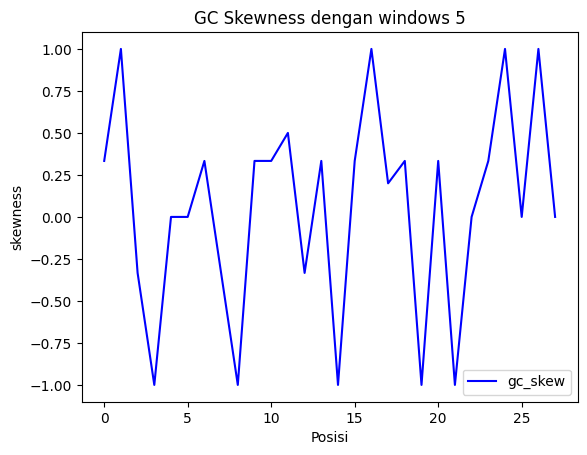

In [21]:
#buat plot untuk ditampilkan
plt.plot(apoE_gc_skew, label='gc_skew' , color = 'blue')

plt.xlabel('Posisi')
plt.ylabel('skewness')
plt.title('GC Skewness dengan windows 5')

plt.legend()
plt.show()

Nomor 4

In [22]:
#mengambil sequence dari file fasta
#sequence yang diambil hanya 138 karakter pertama
# hal ini dilakukan karena MSA hanya mendukung jumlah alignment yang sama
seqapoeAcipenser = apoeAcipenser[0].seq[:138]
seqapoeBos = apoeBos[0].seq[:138]
seqapoECercopithecus = apoeCercopithecus[0].seq[:138]
seqapoeOryctolagus= apoeOryctolagus[0].seq[:138]
seqapoePan = apoePan[0].seq[:138]
seqapoeSiniperca = apoeSiniperca[0].seq[:138]

In [23]:
#membuat multiple sequence alignment
sequences = [
    SeqRecord(seqapoeAcipenser,id = 'Acipenser'),
    SeqRecord(seqapoeBos,id = 'Bos Taurus'),
    SeqRecord(seqapoECercopithecus,id = 'Cercoptithecus aethiops'),
    SeqRecord(seqapoeOryctolagus,id = 'Oryctolagus cuniculus'),
    SeqRecord(seqapoePan,id = 'Pan troglodytes'),
    SeqRecord(seqapoeSiniperca,id = 'Siniperca chuatsi')  
]

In [24]:
#menyimpan hasil multiple sequence alignment dalam variabel
align = MultipleSeqAlignment(sequences)

In [25]:
#fungsi untuk meelihat daerah yang termutasi
def mutations(alignment, acipenser_seq):
    results = {}
    acipenser_seq_str = str(acipenser_seq)

    for record in alignment:
        if record.id != 'Acipenser':
            conserved = []
            mutations = []
            for i, (acipenser_res, other_res) in enumerate(zip(acipenser_seq_str, str(record.seq))):
                if acipenser_res == other_res:
                    conserved.append((i+1, acipenser_res))
                else:
                    mutations.append((i+1, acipenser_res, other_res))
            results[record.id] = {
                'conserved': conserved,
                'mutations': mutations
            }
    return results

In [26]:
#fungsi untuk melihat daerah konservatif
def conserved(alignment, acipenser_seq):
    results = {}
    acipenser_seq_str = str(acipenser_seq)

    for record in alignment:
        if record.id != 'Acipenser':
            comparison = []
            for acipenser_res, other_res in zip(acipenser_seq_str, str(record.seq)):
                if acipenser_res == other_res:
                    comparison.append(acipenser_res)
                else:
                    comparison.append('x')
            results[record.id] = ''.join(comparison)
    return results

In [27]:
#menampilkan hasil mutasi
results_mutation = mutations(align, seqapoeAcipenser)

# Tampilkan hasil perspecies
for species, data in results_mutation.items():
    print(f"\nHasil untuk {species}:")
    
    print("Mutasi:")
    for pos, acipenser_res, other_res in data['mutations']:
        print(f"Posisi {pos}: Acipenser ({acipenser_res}) -> {species} ({other_res})")


Hasil untuk Bos Taurus:
Mutasi:
Posisi 2: Acipenser (G) -> Bos Taurus (C)
Posisi 3: Acipenser (A) -> Bos Taurus (G)
Posisi 6: Acipenser (A) -> Bos Taurus (G)
Posisi 8: Acipenser (T) -> Bos Taurus (C)
Posisi 9: Acipenser (T) -> Bos Taurus (G)
Posisi 10: Acipenser (G) -> Bos Taurus (A)
Posisi 11: Acipenser (G) -> Bos Taurus (A)
Posisi 12: Acipenser (A) -> Bos Taurus (G)
Posisi 13: Acipenser (A) -> Bos Taurus (G)
Posisi 14: Acipenser (C) -> Bos Taurus (A)
Posisi 16: Acipenser (C) -> Bos Taurus (G)
Posisi 17: Acipenser (T) -> Bos Taurus (C)
Posisi 18: Acipenser (A) -> Bos Taurus (G)
Posisi 19: Acipenser (C) -> Bos Taurus (G)
Posisi 20: Acipenser (A) -> Bos Taurus (T)
Posisi 21: Acipenser (C) -> Bos Taurus (T)
Posisi 22: Acipenser (C) -> Bos Taurus (T)
Posisi 23: Acipenser (G) -> Bos Taurus (C)
Posisi 24: Acipenser (G) -> Bos Taurus (T)
Posisi 25: Acipenser (A) -> Bos Taurus (G)
Posisi 26: Acipenser (A) -> Bos Taurus (G)
Posisi 28: Acipenser (T) -> Bos Taurus (G)
Posisi 29: Acipenser (A) -

In [28]:
# Lakukan perbandingan
results_conserve = conserved(align, seqapoeAcipenser)

# Tampilkan hasil
for species, comparison in results_conserve.items():
    print(f"\nHasil untuk {species}:")
    print(comparison)


Hasil untuk Bos Taurus:
CxxGAxGxxxxxxxCxxxxxxxxxxxAxxxxAxxxAxxCxxxxxxxCAxxxGCxxGxCAGxxxxxxxxxGxTCTxxxxGxxGxxxxxxxGGxxxCxCxxxxxGCAxxxxxxCAGxxxGxxAxxGxxGxxxAxxxxGxx

Hasil untuk Cercoptithecus aethiops:
xxxxAxxxxxGxxCxxxxCxxCGxxxxxxxCxGxGxGxxCACCCxxCxGxxxxTxxGxxxxxxGxAxxxxxxxxxxxxxGAxxxTGxxGGxxxTxxxxxxxxxCAxxTCxxxAxTxxxGxAxxxGxxxxxxxxxxxxx

Hasil untuk Oryctolagus cuniculus:
CxxxxxxxxGGxxCxxxxxAxxxxxxxxAxxAGxxxxxxxACCxAxxxxxxxxxGxxxAxxxxGxxGxxGxxxxxxxTGxxGxxxGCxGxGAxxCTxxxAGxxxxCxxxxxCxxxAxGGxxxAGGAGxTxxAGxxGCx

Hasil untuk Pan troglodytes:
CxxxxxxxxxGAAxxxxxxxCxxxxxxxxxxxxxGAxTxxxCxxxxxxxxxxxxGxxxAxxxxGxxxCxGxxxxxxxxGxxGxxxGxCxxxxxxCTxxxAGxxxxCxxxxxCAxxxxGGxxxAxGxGxTxxAGAxxxA

Hasil untuk Siniperca chuatsi:
xxxxAxxTxxxxxCxxTAxxCCxxxxxxxxxxxxxxxTCxxxxxxxxxxAxGCxxGxxxxxTxxCxxxxGATxxxxxxxxxxxxTxCxGGGAGxxxxCAxxxGxxxxxxxxxAGxAxxxxxxxxxAGxTCxxxAxxxx


In [29]:
# sequence yang akan dijadikan sebagai target
# sequence dijakian string untuk mempermudah proses
# alasan memotong sequence untuk memperceepat pemodelan :)
sequences = [
    str(apoeAcipenser[0].seq[:138]),
    str(apoeBos[0].seq[:138]),
    str(apoeCercopithecus[0].seq[:138]),
    str(apoeOryctolagus[0].seq[:138]),
    str(apoePan[0].seq[:138]),
    str(apoeSiniperca[0].seq[:138])
]

In [30]:
#fungsi untuk menghitung skor alignment
#berguna untuk kperhitungan optimisasi
def alignment_score(params):
    gap_open_penalty, gap_extend_penalty = params
    if gap_open_penalty < gap_extend_penalty:
        return np.inf  # invalid parameter combination
    total_score = 0
    num_alignments = 0
    for i in range(len(sequences)):
        for j in range(i + 1, len(sequences)):
            alignments = pairwise2.align.globalxs(sequences[i], sequences[j], -gap_open_penalty, -gap_extend_penalty)
            total_score += alignments[0].score  # Add the score of the best alignment
            num_alignments += 1
    average_score = total_score / num_alignments
    return -average_score  # Negative because differential_evolution minimizes the function

In [31]:
# menentukan nilai batas untuk gap open dan gap extend
bounds = [(0.1, 10.0), (0.1, 10.0)]

# melakukan pergitungan optimisasi
result = differential_evolution(alignment_score, bounds)

#mendapatkan hasil optimisasi untuk gap open dan gap extend
best_gap_open_penalty, best_gap_extend_penalty = result.x

In [32]:
#menampilkan hasil optimisasi untuk gap open dan gap extend`
print(f"Best gap open penalty: {best_gap_open_penalty}")
print(f"Best gap extend penalty: {best_gap_extend_penalty}")

Best gap open penalty: 0.1
Best gap extend penalty: 0.1


In [33]:
# mencetak hasil alignment terbaik
best_alignments = pairwise2.align.globalxs(sequences[0], sequences[1], -best_gap_open_penalty, -best_gap_extend_penalty)
print(format_alignment(*best_alignments[0]))

C-GAGAAGTTG-GAACCCTACACCGGAAATATCAGAGAGTCCACCCAGCAGAAGCTG--GGC-A---GCTTGC-AGCAGATC----TTCT-TGGAGAGTGCCGGGAGTC-TCCAAGAGCACTTCAA-CAGTAAGGCAGA-GGAGT-TCAAG--A-AGCA----
| | | ||  | |||  ..|| .|||   |.||.| |||.|.|   || | |.||.|  ||| |   ||..|| ||.||||.    |||| ||| | .|||||.| ||. | |    ||.||||.. |||.|.|.|||. ||| | |..||  | |||.    
CCG-G-AG--GCGAA--GGAC-GCGG---TTTCTG-GAGGCGA---AG-A-ACGCGGTTGGCCAATCGCAAGCCAGAAGATGAAGGTTCTGTGG-G-TTGCCGTG-GTGGT-C----GCGCTTCTGGCAGGATGCCAGGCGGA-TATGGAGGGAGAGCTGGGG
  Score=82



In [34]:
# mencetak hasil alignment terbaik
# ini adalah garis pertama dari alignment terbaik dari semua species terhadap Acipenser
first_alignment_line = format_alignment(*best_alignments[0]).split('\n')[0]
print("First line of the best alignment:")
print(first_alignment_line)

First line of the best alignment:
C-GAGAAGTTG-GAACCCTACACCGGAAATATCAGAGAGTCCACCCAGCAGAAGCTG--GGC-A---GCTTGC-AGCAGATC----TTCT-TGGAGAGTGCCGGGAGTC-TCCAAGAGCACTTCAA-CAGTAAGGCAGA-GGAGT-TCAAG--A-AGCA----


Nomor 5

In [35]:
#potong sequence dengan panjang paling APOE paling pendek
#hal ini dilakukan agar dapat dilakukan multiple sequence alignment
seqapoeAcipenser = apoeAcipenser[0].seq[:138]
seqapoeBos = apoeBos[0].seq[:138]
seqapoECercopithecus = apoeCercopithecus[0].seq[:138]
seqapoeOryctolagus= apoeOryctolagus[0].seq[:138]
seqapoePan = apoePan[0].seq[:138]
seqapoESiniperca = apoeSiniperca[0].seq[:138]


In [36]:
#membuat multiple sequence alignment
sequences = [
    SeqRecord(seqapoeAcipenser,id = 'Acipenser'),
    SeqRecord(seqapoeBos,id = 'Bos Taurus'),
    SeqRecord(seqapoECercopithecus,id = 'Cercoptithecus'),
    SeqRecord(seqapoeOryctolagus,id = 'Oryctolagus'),
    SeqRecord(seqapoePan,id = 'Pan troglodytes'),
    SeqRecord(seqapoESiniperca,id = 'Siniperca')  
]

In [37]:
# Membuat fungsi hamming distance
def hamming_distance(seq1, seq2):
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

In [38]:
#membuat matriks hamming distance
num_sequences = len(sequences)
hamming_matrix = np.zeros((num_sequences, num_sequences), dtype=int)

In [39]:
#mengisi matriks hamming distance
for i in range(num_sequences):
    for j in range(num_sequences):
        hamming_matrix[i, j] = hamming_distance(sequences[i].seq, sequences[j].seq)

In [40]:
# Mengonversi matriks menjadi DataFrame agar lebih rapi
sequence_ids = [seq.id for seq in sequences]
hamming_df = pd.DataFrame(hamming_matrix, index=sequence_ids, columns=sequence_ids)
# Menggunakan tabulate untuk mem print DataFrame dalam format tabel
table = tabulate(hamming_df, headers='keys', tablefmt='grid')

In [41]:
# Mencetak matriks Hamming distance
print("Matriks Hamming Distance:")
print(table)

Matriks Hamming Distance:
+-----------------+-------------+--------------+------------------+---------------+-------------------+-------------+
|                 |   Acipenser |   Bos Taurus |   Cercoptithecus |   Oryctolagus |   Pan troglodytes |   Siniperca |
+=================+=============+==============+==================+===============+===================+=============+
| Acipenser       |           0 |           99 |              101 |            94 |               103 |         102 |
+-----------------+-------------+--------------+------------------+---------------+-------------------+-------------+
| Bos Taurus      |          99 |            0 |              111 |            99 |                99 |          96 |
+-----------------+-------------+--------------+------------------+---------------+-------------------+-------------+
| Cercoptithecus  |         101 |          111 |                0 |           105 |               103 |         111 |
+-----------------+-----------

In [42]:
# Buat dendrogram
align = MultipleSeqAlignment(sequences)
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(align)


/var/folders/yf/pwm2z7cs7m39fl6g70nggc0r0000gn/T/ipykernel_4572/2596667190.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dm_matrix, method='average')


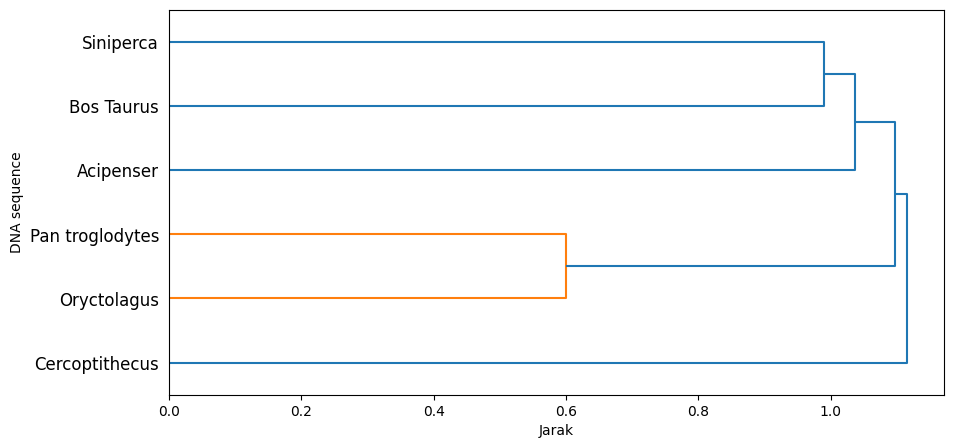

In [43]:

# Membuat matriks Hamming
num_sequences = len(sequences)
hamming_matrix = np.zeros((num_sequences, num_sequences), dtype=int)
sequence_ids = [seq.id for seq in sequences]
hamming_df = pd.DataFrame(hamming_matrix, index=sequence_ids, columns=sequence_ids)

# Menghitung matriks jarak
dm_matrix = np.array(dm)
linkage_matrix = linkage(dm_matrix, method='average')

# Membuat plot dendrogram
fig, ax = plt.subplots(figsize=(10, 5))
dendrogram(linkage_matrix, labels=sequence_ids, orientation='right', ax=ax)

# Menyesuaikan plot
plt.xlabel('Jarak')
plt.ylabel('DNA sequence')
plt.show()
